In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('earnings_train.csv')
df


,DISTRICT_TYPE,DISTRICT_NAME,DISTRICT_CODE,ACADEMIC_YEAR,DEMO_CATEGORY,STUDENT_POPULATION,AWARD_CATEGORY,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,WAGE_YEAR4
0,School District,Duarte Unified,1964469.0,2018-2019,Race,None Reported,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
1,School District,Coronado Unified,3768031.0,2018-2019,Race,None Reported,Associate Degree,0.0,0.0,0.0,0.0
2,School District,Gilroy Unified,4369484.0,2018-2019,Race,Black or African American,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
3,School District,Pleasant Valley,5672553.0,2018-2019,Homeless Status,Did Not Experience Homelessness in K-12,Community College Certificate,0.0,0.0,0.0,0.0
4,Legislative District,Senate District 15,NaN,2018-2019,Race,American Indian or Alaska Native,Community College Certificate,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20700,School District,Armona Union Elementary,1663875.0,2018-2019,Race,American Indian or Alaska Native,Associate Degree,0.0,0.0,0.0,0.0
20701,School District,Taft Union High,1563818.0,2018-2019,Race,White,Community College Certificate,0.0,0.0,0.0,0.0
20702,School District,Bassett Unified,1964295.0,2018-2019,Foster Status,Foster Youth,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
20703,School District,SBE - John Henry High,777354.0,2018-2019,Gender,Male,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0


### 1. Data Exploration

#### Data Quality

In [80]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

print("Data Types:")
print(df.dtypes)
print("\nMissing Data:")
print(df.isnull().sum())
print("\nMissing Data Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))



Data Types:
DISTRICT_TYPE          object
DISTRICT_NAME          object
DISTRICT_CODE         float64
ACADEMIC_YEAR          object
DEMO_CATEGORY          object
STUDENT_POPULATION     object
AWARD_CATEGORY         object
WAGE_YEAR1            float64
WAGE_YEAR2            float64
WAGE_YEAR3            float64
WAGE_YEAR4            float64
dtype: object

Missing Data:
DISTRICT_TYPE            0
DISTRICT_NAME            0
DISTRICT_CODE         2745
ACADEMIC_YEAR            0
DEMO_CATEGORY            0
STUDENT_POPULATION       0
AWARD_CATEGORY           0
WAGE_YEAR1               0
WAGE_YEAR2               0
WAGE_YEAR3               0
WAGE_YEAR4               0
dtype: int64

Missing Data Percentage:
DISTRICT_TYPE          0.00
DISTRICT_NAME          0.00
DISTRICT_CODE         13.26
ACADEMIC_YEAR          0.00
DEMO_CATEGORY          0.00
STUDENT_POPULATION     0.00
AWARD_CATEGORY         0.00
WAGE_YEAR1             0.00
WAGE_YEAR2             0.00
WAGE_YEAR3             0.00
WAGE_YEAR4   

Visualization 1

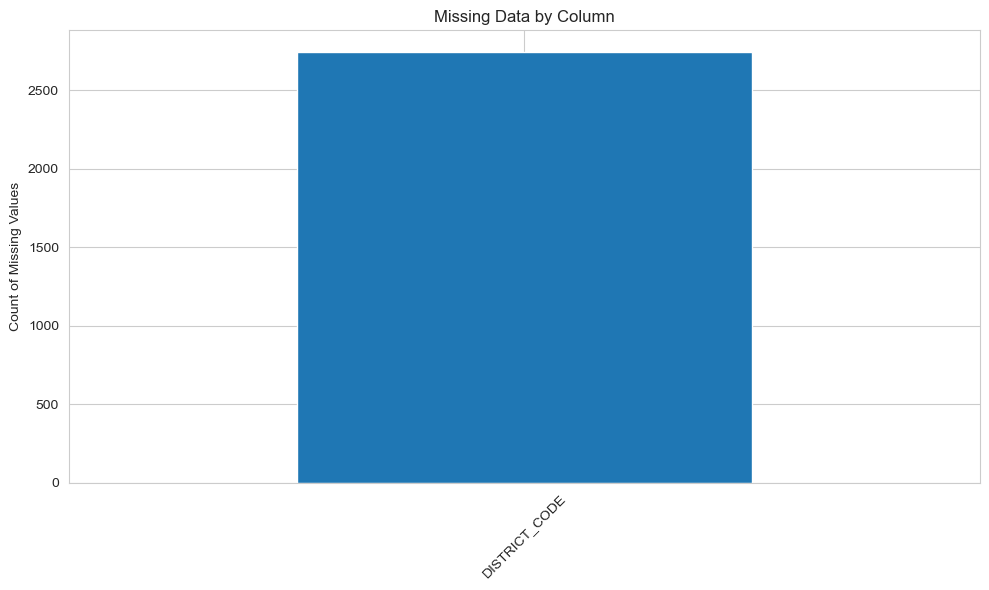

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
if len(missing_data) > 0:
    missing_data.plot(kind='bar', ax=ax)
    ax.set_title('Missing Data by Column')
    ax.set_ylabel('Count of Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No missing data found!")


#### Range

##### Categorial Colomn

In [82]:
catagorical_columns = categorical_cols = ['DISTRICT_TYPE', 'DISTRICT_NAME', 'ACADEMIC_YEAR', 'DEMO_CATEGORY', 
                    'STUDENT_POPULATION', 'AWARD_CATEGORY']

#Unique values
for col in catagorical_columns:
    if col in df.columns:
        unique_count = df[col].nunique()
        print(f"\n{col}:")
        print(f"  Number of unique values: {unique_count}")
        if unique_count <= 20:
            print(f"  Unique values: {df[col].unique()}")
        else:
            print(f"  First 20 unique values: {df[col].unique()[:20]}")






DISTRICT_TYPE:
  Number of unique values: 3
  Unique values: ['School District' 'Legislative District' 'All']

DISTRICT_NAME:
  Number of unique values: 692
  First 20 unique values: ['Duarte Unified' 'Coronado Unified' 'Gilroy Unified' 'Pleasant Valley'
 'Senate District 15' 'Adelanto Elementary' 'Assembly District 56'
 'Klamath-Trinity Joint Unified' 'Modoc Joint Unified'
 'Healdsburg Unified' 'Kings County Office of Education'
 'Assembly District 11' 'Liberty Union High' 'Azusa Unified'
 'Benicia Unified' 'Konocti Unified' 'SBE - Vista Springs Charter'
 'Stone Corral Elementary' 'Santa Cruz County Office of Education'
 'Del Norte County Unified']

ACADEMIC_YEAR:
  Number of unique values: 1
  Unique values: ['2018-2019']

DEMO_CATEGORY:
  Number of unique values: 5
  Unique values: ['Race' 'Homeless Status' 'All' 'Foster Status' 'Gender']

STUDENT_POPULATION:
  Number of unique values: 15
  Unique values: ['None Reported' 'Black or African American'
 'Did Not Experience Homelessnes

Visualization 2

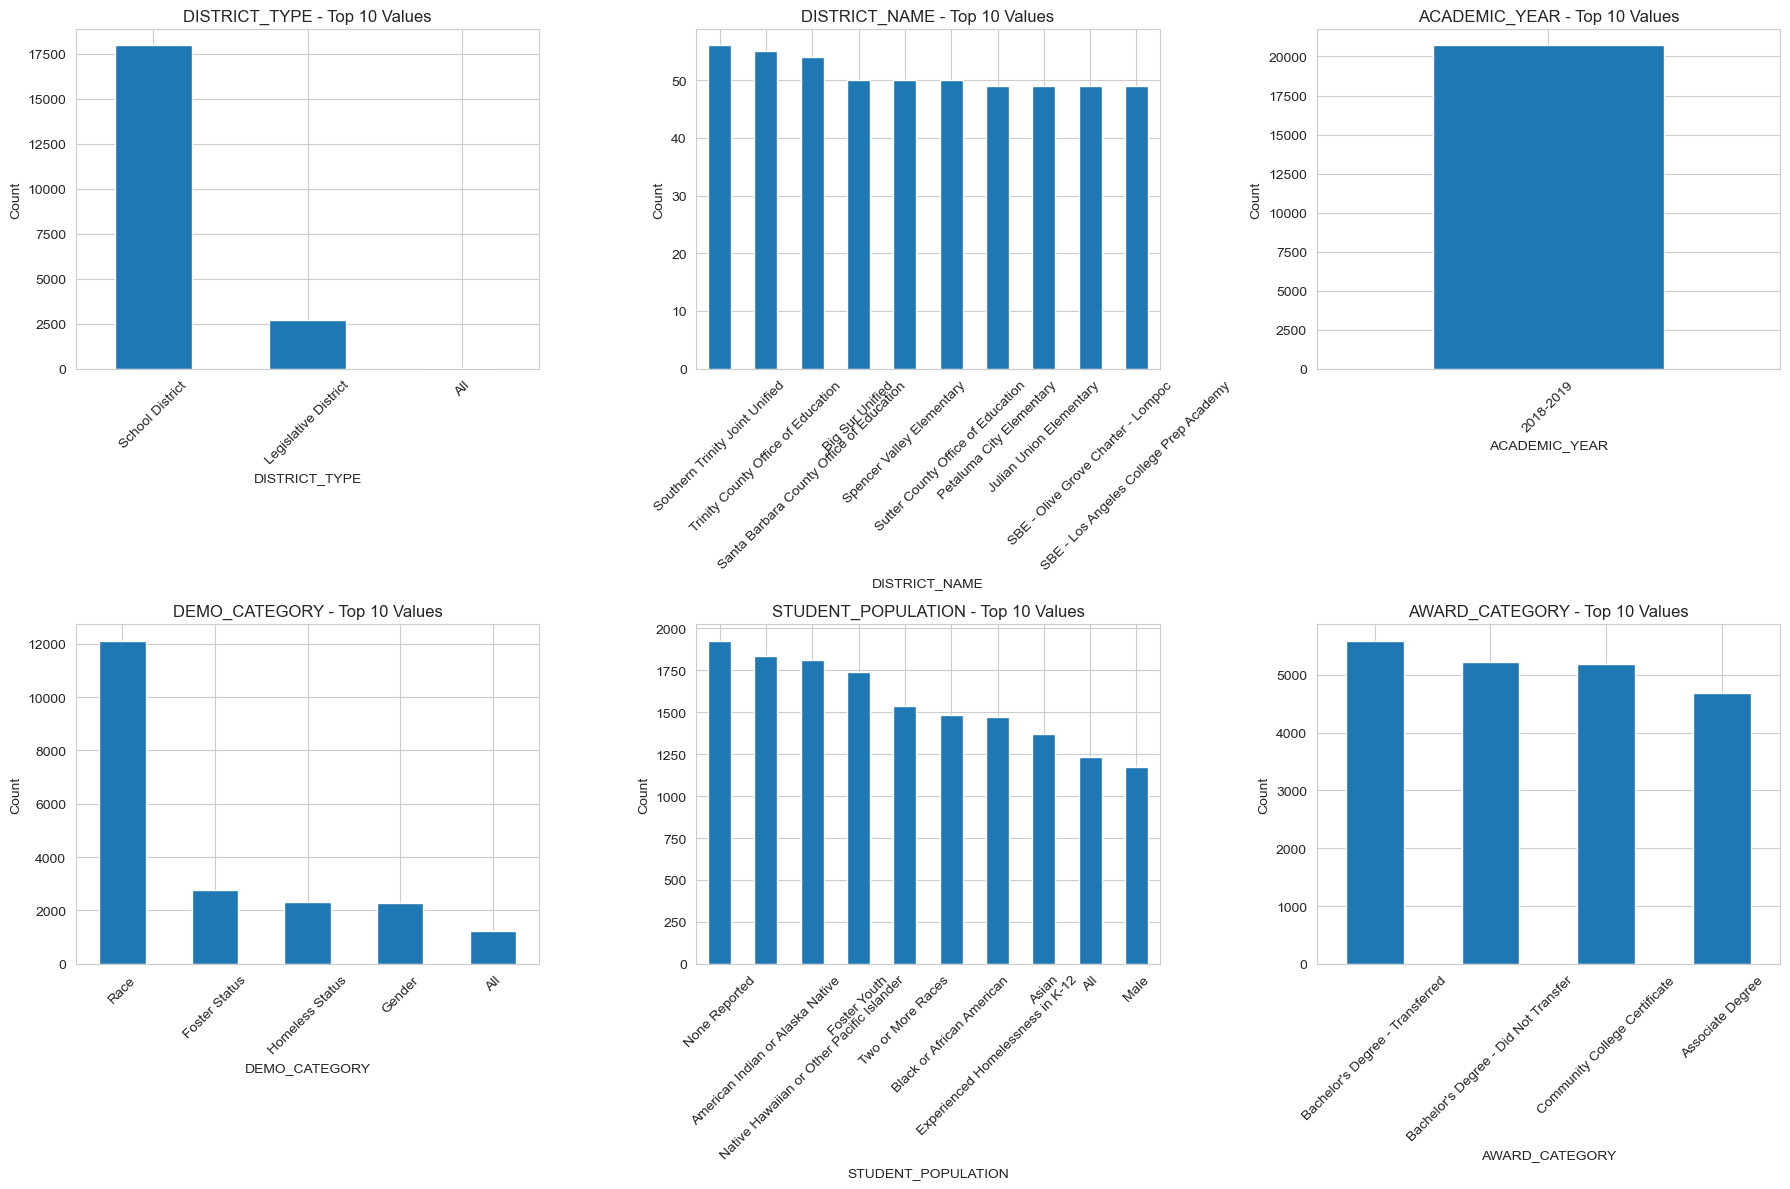

In [83]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols[:6]):
    if col in df.columns:
        value_counts = df[col].value_counts().head(10)
        value_counts.plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'{col} - Top 10 Values')
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### Numeric Columns

In [84]:

#Numerical columns
numeric_cols = ['DISTRICT_CODE', 'WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']

for col in numeric_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Min: {df[col].min()}")
        print(f"  Max: {df[col].max()}")
        print(f"  Mean: {df[col].mean()}")
        print(f"  Median: {df[col].median()}")
        print(f"  Standard Deviation: {df[col].std()}")

#Check normal distribution
for col in numeric_cols:
    if col in df.columns:
        if 'WAGE' in col:
            data = df[df[col] > 0][col]
        else:
            data = df[col].dropna()
        
        if len(data) > 3:  # Need at least 3 samples for test
            stat, p_value = stats.shapiro(data.sample(min(5000, len(data))))
            is_normal = "Yes" if p_value > 0.05 else "No"
            print(f"{col}: p-value = {p_value:.4f}, Normally distributed: {is_normal}")




DISTRICT_CODE:
  Min: 110017.0
  Max: 5872769.0
  Mean: 3041330.7105790647
  Median: 3166852.0
  Standard Deviation: 1583286.1984886068

WAGE_YEAR1:
  Min: 0.0
  Max: 97993.0
  Mean: 4476.106834098044
  Median: 0.0
  Standard Deviation: 11944.502346483778

WAGE_YEAR2:
  Min: 0.0
  Max: 132847.0
  Mean: 6075.533252837479
  Median: 0.0
  Standard Deviation: 16140.916902879779

WAGE_YEAR3:
  Min: 0.0
  Max: 146728.0
  Mean: 7310.831634870804
  Median: 0.0
  Standard Deviation: 19158.203471238325

WAGE_YEAR4:
  Min: 0.0
  Max: 153910.0
  Mean: 8530.890412943734
  Median: 0.0
  Standard Deviation: 22106.663178871004
DISTRICT_CODE: p-value = 0.0000, Normally distributed: No
WAGE_YEAR1: p-value = 0.0000, Normally distributed: No
WAGE_YEAR2: p-value = 0.0000, Normally distributed: No
WAGE_YEAR3: p-value = 0.0000, Normally distributed: No
WAGE_YEAR4: p-value = 0.0000, Normally distributed: No


Visualization 3

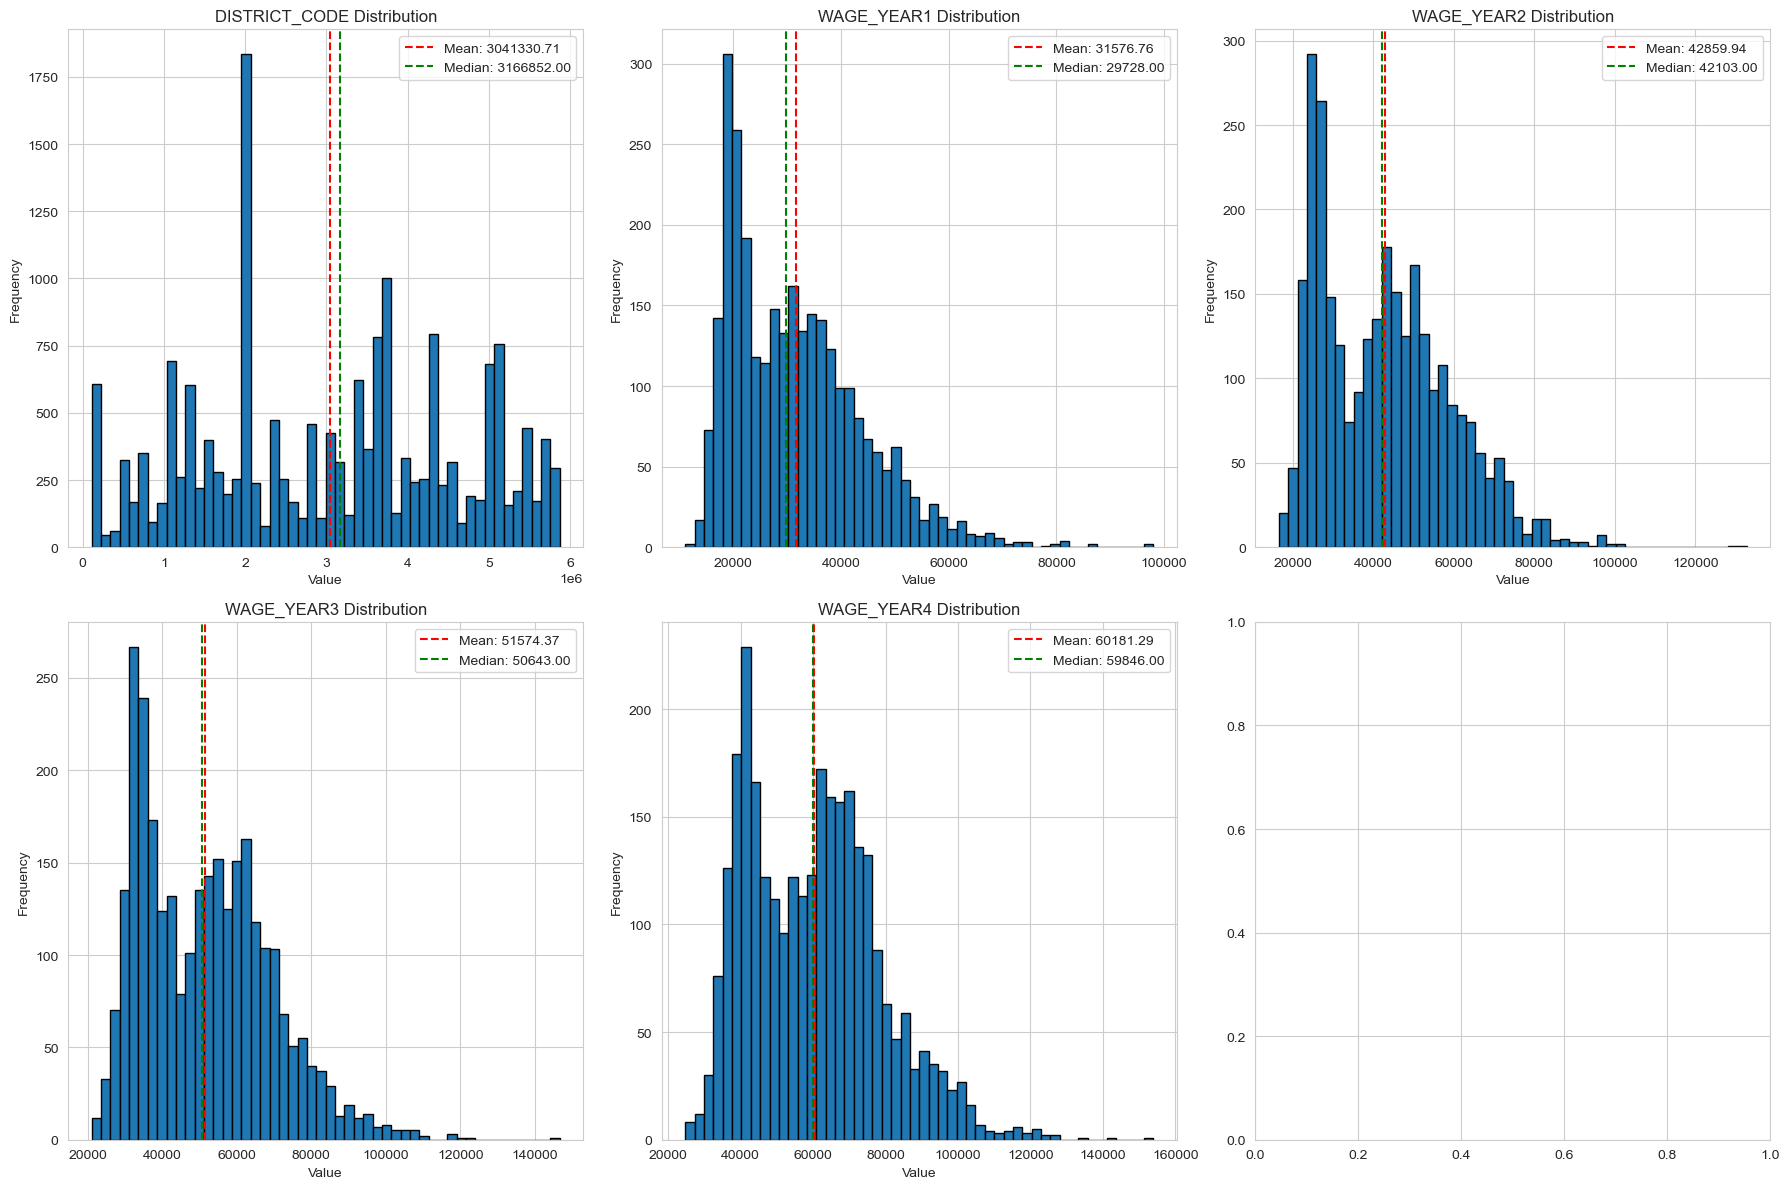

In [85]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols[:6]):
    if col in df.columns:
        if 'WAGE' in col:
            data = df[df[col] > 0][col]
        else:
            data = df[col].dropna()
        
        if len(data) > 0:
            axes[idx].hist(data, bins=50, edgecolor='black')
            axes[idx].set_title(f'{col} Distribution')
            axes[idx].set_xlabel('Value')
            axes[idx].set_ylabel('Frequency')
            axes[idx].axvline(data.mean(), color='r', linestyle='--', label=f'Mean: {data.mean():.2f}')
            axes[idx].axvline(data.median(), color='g', linestyle='--', label=f'Median: {data.median():.2f}')
            axes[idx].legend()

plt.tight_layout()
plt.show()

#### CS562 Questions


##### WAGE_YEAR3

In [86]:
df_nonzero = df[(df['WAGE_YEAR3'] > 0) & 
                (df['STUDENT_POPULATION'] != 'None Reported') & 
                (df['STUDENT_POPULATION'] != 'All')].copy()
# Group by DEMO_CATEGORY and STUDENT_POPULATION
demo_wage = df_nonzero.groupby(['DEMO_CATEGORY', 'STUDENT_POPULATION'])['WAGE_YEAR3'].agg(['mean', 'count']).reset_index()
demo_wage = demo_wage.sort_values('mean', ascending=False)



Visualization 4

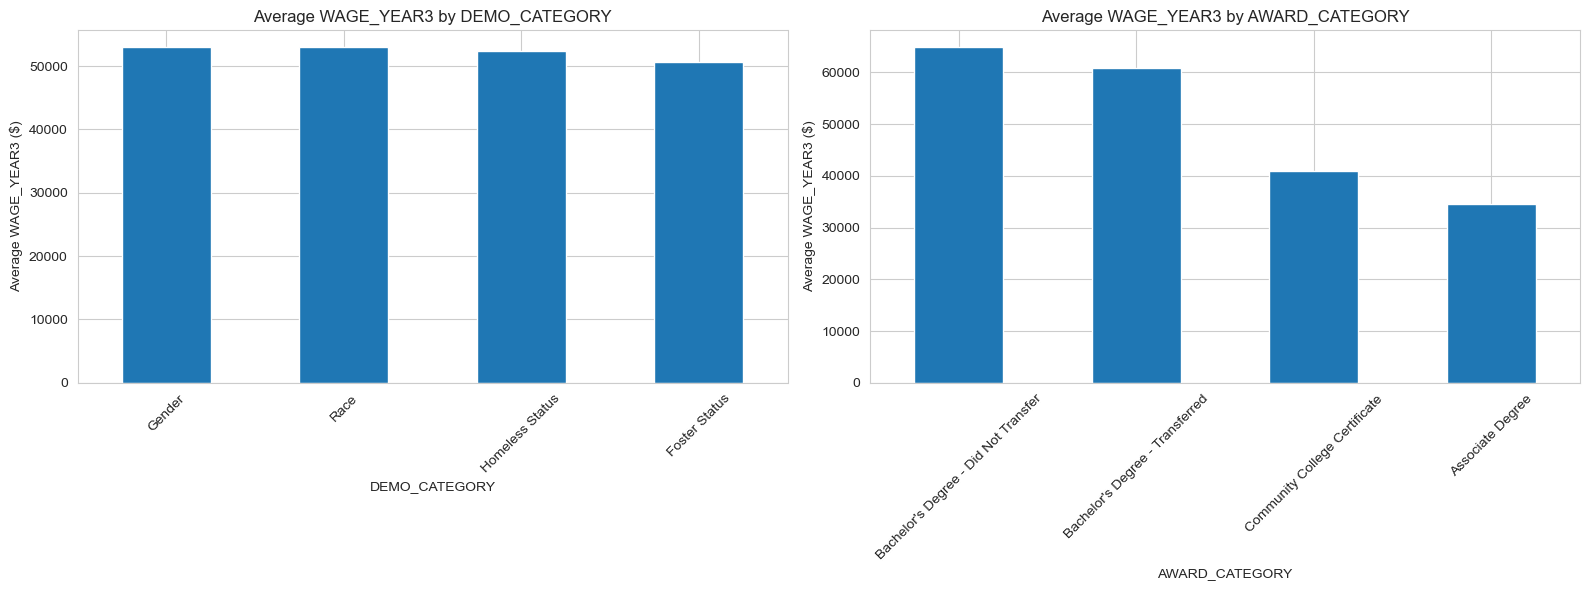

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# By DEMO_CATEGORY
demo_cat_wage = df_nonzero.groupby('DEMO_CATEGORY')['WAGE_YEAR3'].mean().sort_values(ascending=False)
demo_cat_wage.plot(kind='bar', ax=axes[0])
axes[0].set_title('Average WAGE_YEAR3 by DEMO_CATEGORY')
axes[0].set_ylabel('Average WAGE_YEAR3 ($)')
axes[0].tick_params(axis='x', rotation=45)

# By AWARD_CATEGORY
award_wage = df_nonzero.groupby('AWARD_CATEGORY')['WAGE_YEAR3'].mean().sort_values(ascending=False)
award_wage.plot(kind='bar', ax=axes[1])
axes[1].set_title('Average WAGE_YEAR3 by AWARD_CATEGORY')
axes[1].set_ylabel('Average WAGE_YEAR3 ($)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Highest demographics by average WAGE_YEAR3

In [88]:
highest_demo = demo_wage.iloc[0]
print(f"\nHighest WAGE_YEAR3: {highest_demo['DEMO_CATEGORY']} - {highest_demo['STUDENT_POPULATION']} (${highest_demo['mean']:,.2f})")




Highest WAGE_YEAR3: Race - Asian ($61,497.25)


Lowest by WAGE_YEAR3

In [89]:
lowest_demo = demo_wage.iloc[-1]
print(f"Lowest WAGE_YEAR3: {lowest_demo['DEMO_CATEGORY']} - {lowest_demo['STUDENT_POPULATION']} (${lowest_demo['mean']:,.2f})")

Lowest WAGE_YEAR3: Homeless Status - Experienced Homelessness in K-12 ($42,112.33)


Visualization 5

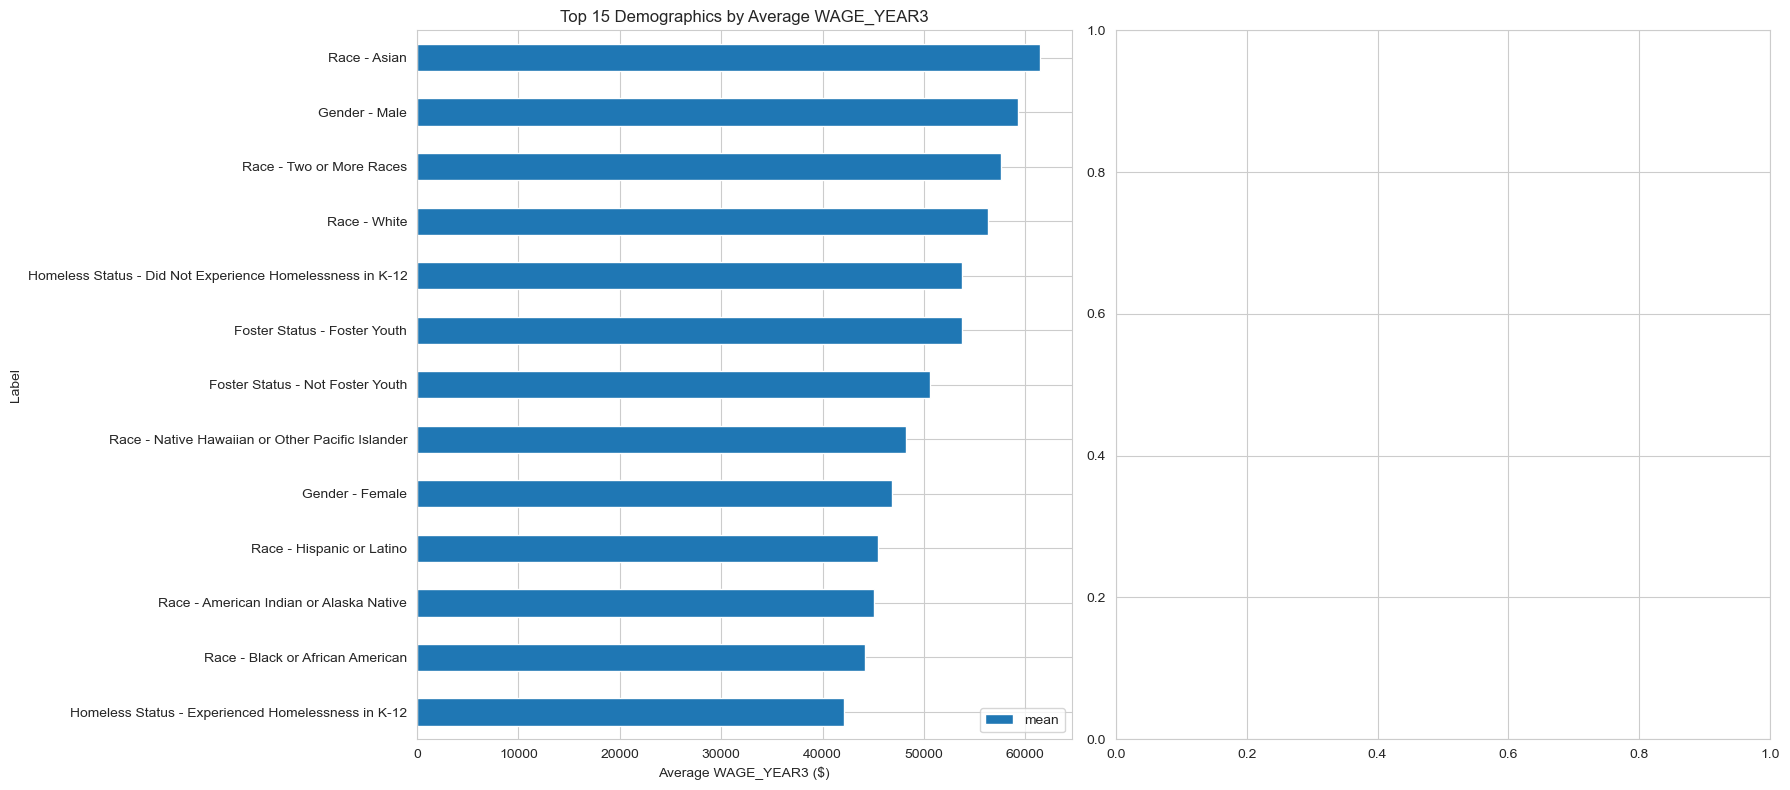

In [90]:
# Visualization 5: Top and Bottom Demographics
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top 15 demographics
top_15 = demo_wage.head(15)
top_15['Label'] = top_15['DEMO_CATEGORY'] + ' - ' + top_15['STUDENT_POPULATION']
top_15.plot(x='Label', y='mean', kind='barh', ax=axes[0])
axes[0].set_title('Top 15 Demographics by Average WAGE_YEAR3')
axes[0].set_xlabel('Average WAGE_YEAR3 ($)')
axes[0].invert_yaxis()


plt.tight_layout()
plt.show()

##### Negative Wage Trends

In [91]:
df_nonzero['WAGE_TREND'] = df_nonzero['WAGE_YEAR3'] - df_nonzero['WAGE_YEAR1']
df_nonzero['WAGE_TREND_PCT'] = ((df_nonzero['WAGE_YEAR3'] - df_nonzero['WAGE_YEAR1']) / df_nonzero['WAGE_YEAR1'] * 100)

In [92]:
negative_trend = df_nonzero[df_nonzero['WAGE_TREND'] < 0]

if len(negative_trend) > 0:
    neg_demo = negative_trend.groupby(['DEMO_CATEGORY', 'STUDENT_POPULATION']).agg({
        'WAGE_TREND': ['mean', 'count'],
        'WAGE_YEAR1': 'mean',
        'WAGE_YEAR3': 'mean'
    }).round(2)
    neg_demo.columns = ['Avg_Trend', 'Count', 'Avg_Wage_Y1', 'Avg_Wage_Y3']
    neg_demo = neg_demo.sort_values('Count', ascending=False)
    print(neg_demo.head(15))
    
    print("\nBy AWARD_CATEGORY:")
    print(negative_trend.groupby('AWARD_CATEGORY')['WAGE_TREND'].agg(['mean', 'count']).sort_values('count', ascending=False))


                                  Avg_Trend  Count  Avg_Wage_Y1  Avg_Wage_Y3
DEMO_CATEGORY STUDENT_POPULATION                                            
Foster Status Not Foster Youth     -2009.67      3     35899.67      33890.0
Gender        Male                 -5620.00      2     59360.50      53740.5
Race          Hispanic or Latino    -844.00      1     28199.00      27355.0
              White                -2054.00      1     66051.00      63997.0

By AWARD_CATEGORY:
                                             mean  count
AWARD_CATEGORY                                          
Bachelor's Degree - Did Not Transfer -2836.000000      3
Community College Certificate        -2847.333333      3
Associate Degree                     -3117.000000      1


##### Positive Wage Trends

In [93]:
positive_trend = df_nonzero[df_nonzero['WAGE_TREND'] > 0]

if len(positive_trend) > 0:
    pos_demo = positive_trend.groupby(['DEMO_CATEGORY', 'STUDENT_POPULATION']).agg({
        'WAGE_TREND': ['mean', 'count'],
        'WAGE_YEAR1': 'mean',
        'WAGE_YEAR3': 'mean'
    }).round(2)
    pos_demo.columns = ['Avg_Trend', 'Count', 'Avg_Wage_Y1', 'Avg_Wage_Y3']
    pos_demo = pos_demo.sort_values('Count', ascending=False)
    print(pos_demo.head(15))
    
    print("\nBy AWARD_CATEGORY:")
    print(positive_trend.groupby('AWARD_CATEGORY')['WAGE_TREND'].agg(['mean', 'count']).sort_values('count', ascending=False))


                                                           Avg_Trend  Count  \
DEMO_CATEGORY   STUDENT_POPULATION                                            
Gender          Female                                      18769.12    421   
Foster Status   Not Foster Youth                            19543.29    416   
Gender          Male                                        22130.78    409   
Race            Hispanic or Latino                          17472.93    292   
                White                                       22847.11    243   
Homeless Status Did Not Experience Homelessness in K-12     21230.33    236   
Race            Asian                                       23516.05    174   
Homeless Status Experienced Homelessness in K-12            14805.64     33   
Race            Black or African American                   17104.60     15   
                Two or More Races                           21803.00      9   
Foster Status   Foster Youth                        

Visualization 6

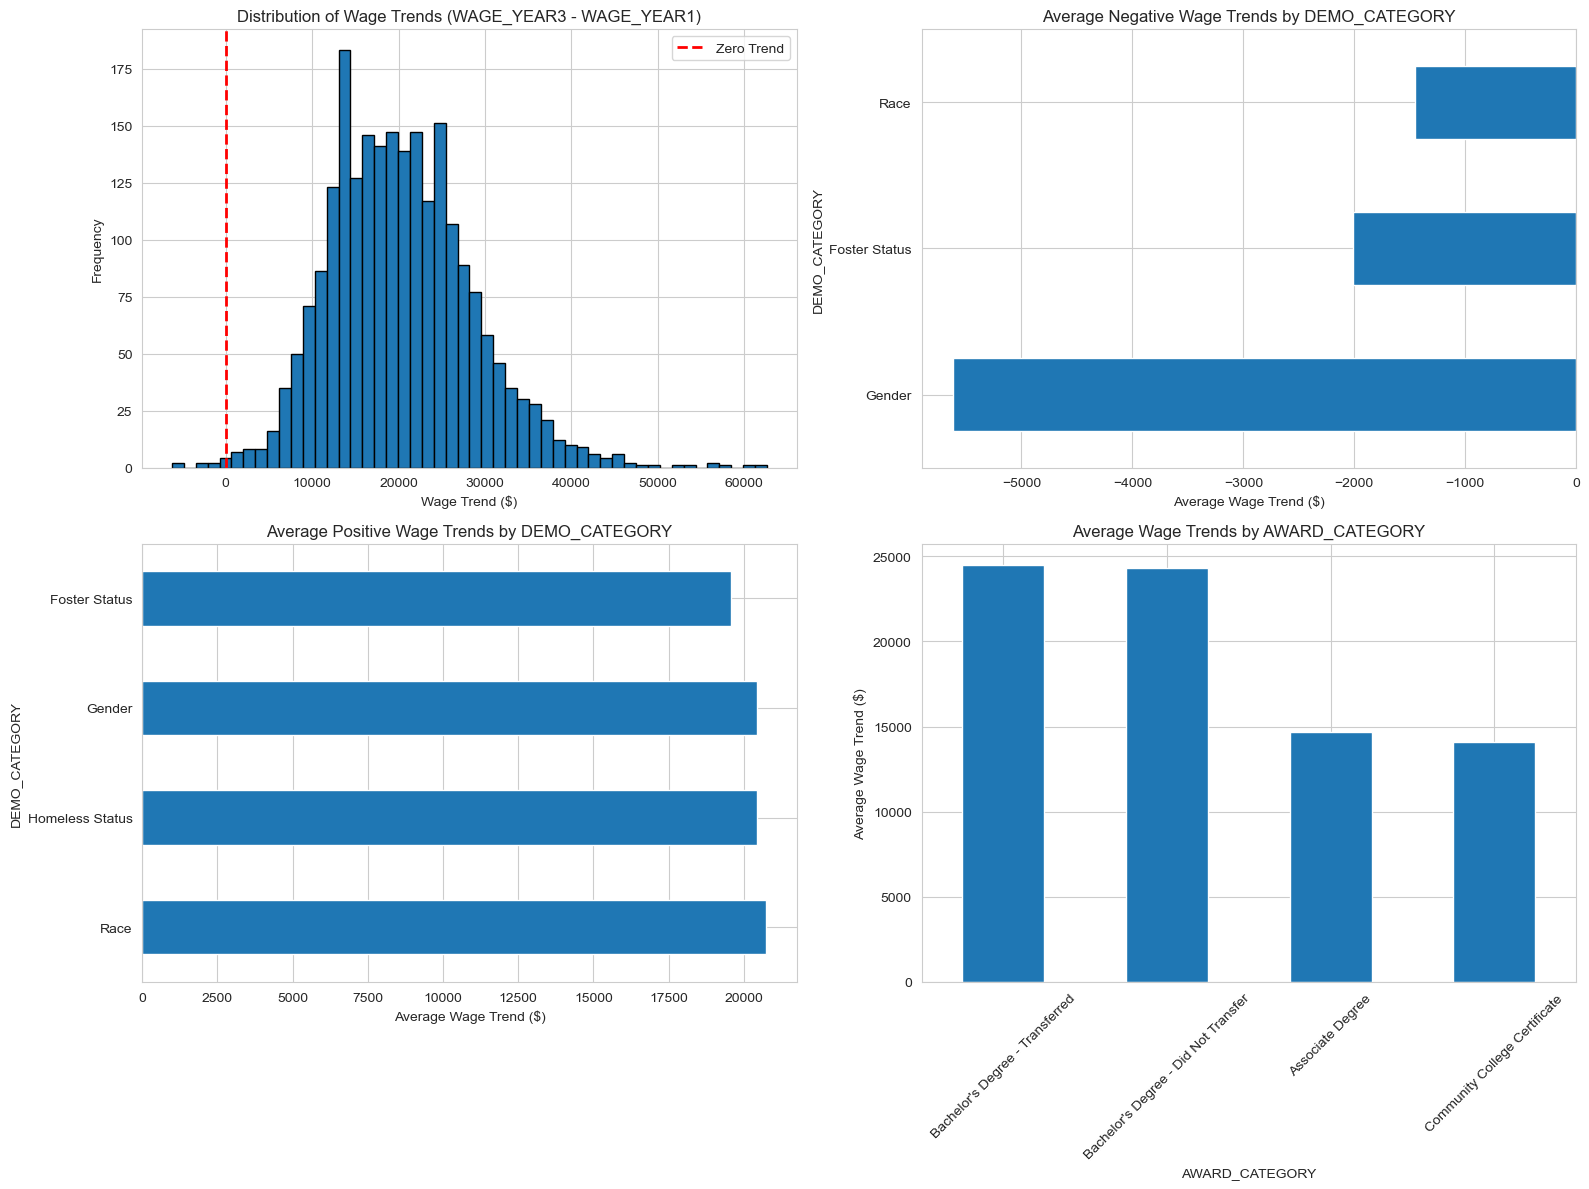

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution of wage trends
axes[0, 0].hist(df_nonzero['WAGE_TREND'], bins=50, edgecolor='black')
axes[0, 0].axvline(0, color='r', linestyle='--', linewidth=2, label='Zero Trend')
axes[0, 0].set_title('Distribution of Wage Trends (WAGE_YEAR3 - WAGE_YEAR1)')
axes[0, 0].set_xlabel('Wage Trend ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Negative trends by demographic
if len(negative_trend) > 0:
    neg_by_demo = negative_trend.groupby('DEMO_CATEGORY')['WAGE_TREND'].mean().sort_values()
    neg_by_demo.plot(kind='barh', ax=axes[0, 1])
    axes[0, 1].set_title('Average Negative Wage Trends by DEMO_CATEGORY')
    axes[0, 1].set_xlabel('Average Wage Trend ($)')

# Positive trends by demographic
if len(positive_trend) > 0:
    pos_by_demo = positive_trend.groupby('DEMO_CATEGORY')['WAGE_TREND'].mean().sort_values(ascending=False)
    pos_by_demo.plot(kind='barh', ax=axes[1, 0])
    axes[1, 0].set_title('Average Positive Wage Trends by DEMO_CATEGORY')
    axes[1, 0].set_xlabel('Average Wage Trend ($)')

# Wage trends by award category
if len(df_nonzero) > 0:
    trend_by_award = df_nonzero.groupby('AWARD_CATEGORY')['WAGE_TREND'].mean().sort_values(ascending=False)
    trend_by_award.plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Average Wage Trends by AWARD_CATEGORY')
    axes[1, 1].set_ylabel('Average Wage Trend ($)')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Overall series of wages

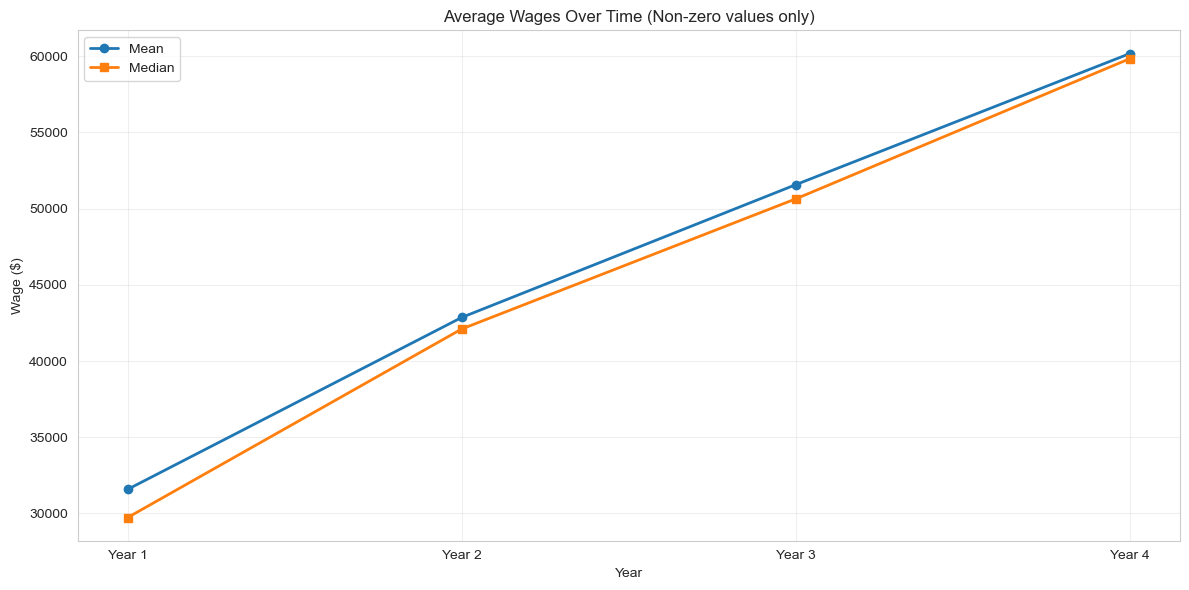

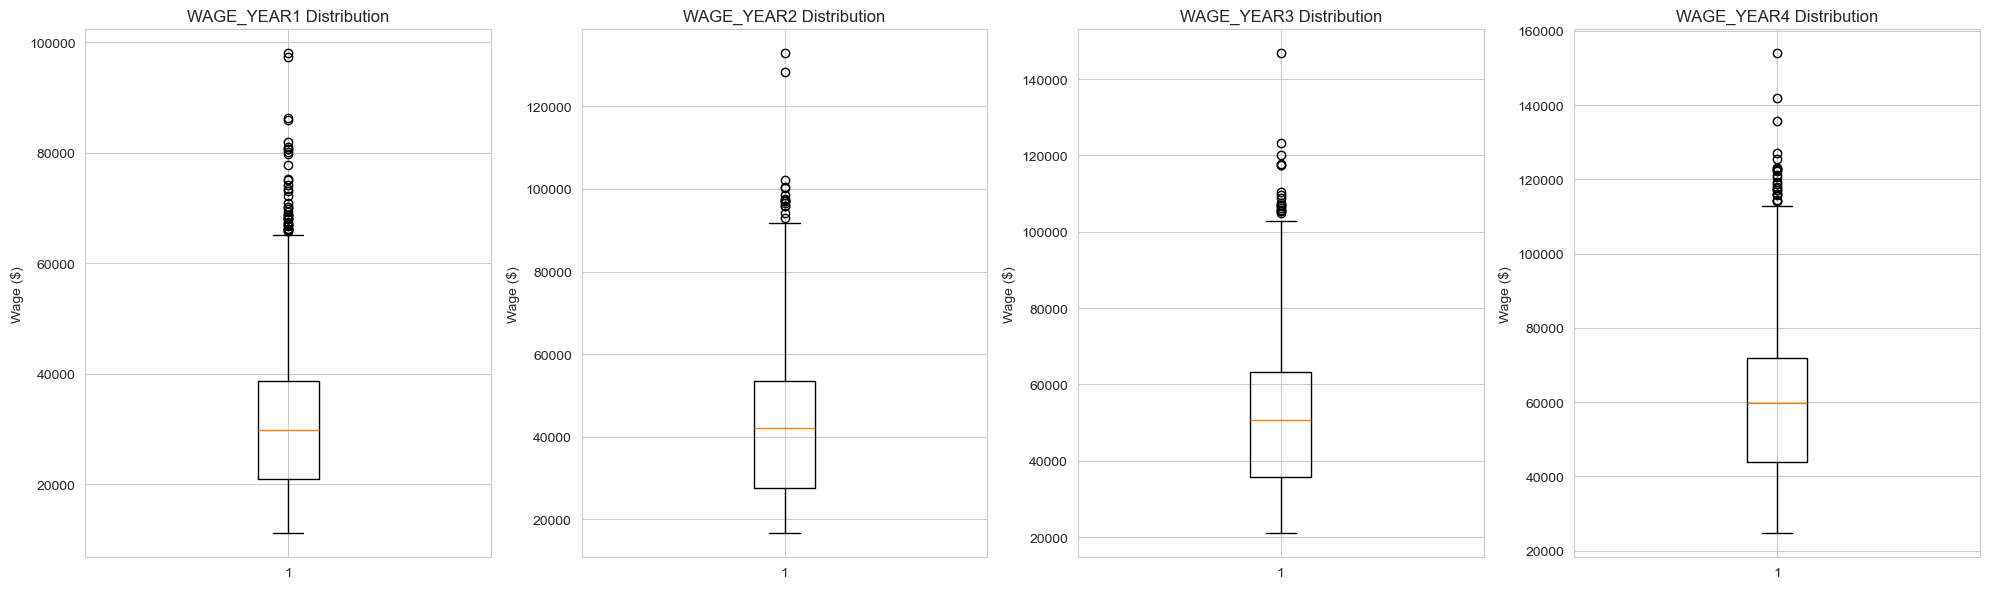

In [95]:
fig, ax = plt.subplots(figsize=(12, 6))
wage_cols = ['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']
wage_means = [df[df[col] > 0][col].mean() for col in wage_cols]
wage_medians = [df[df[col] > 0][col].median() for col in wage_cols]

x = range(1, 5)
ax.plot(x, wage_means, marker='o', label='Mean', linewidth=2)
ax.plot(x, wage_medians, marker='s', label='Median', linewidth=2)
ax.set_title('Average Wages Over Time (Non-zero values only)')
ax.set_xlabel('Year')
ax.set_ylabel('Wage ($)')
ax.set_xticks(x)
ax.set_xticklabels(['Year 1', 'Year 2', 'Year 3', 'Year 4'])
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization 8: Box plots for wage distributions
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
for idx, col in enumerate(wage_cols):
    data = df[df[col] > 0][col]
    if len(data) > 0:
        axes[idx].boxplot(data, vert=True)
        axes[idx].set_title(f'{col} Distribution')
        axes[idx].set_ylabel('Wage ($)')
plt.tight_layout()
plt.show()

### Model to predict WAGE_YEAR4

In [96]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

#### Prepare Training Data

In [97]:
# Prepare the training data
# Create a copy for modeling
df_model = df.copy()

# Handle missing DISTRICT_CODE - fill with median
df_model['DISTRICT_CODE'] = df_model['DISTRICT_CODE'].fillna(df_model['DISTRICT_CODE'].median())

# Since ACADEMIC_YEAR has only one value, we can drop it
df_model = df_model.drop('ACADEMIC_YEAR', axis=1)

# DISTRICT_NAME has too many unique values (692), we'll drop it to avoid overfitting
# Alternatively, we could encode it, but with so many categories it's better to drop
df_model = df_model.drop('DISTRICT_NAME', axis=1)

# Encode categorical variables
categorical_cols = ['DISTRICT_TYPE', 'DEMO_CATEGORY', 'STUDENT_POPULATION', 'AWARD_CATEGORY']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col + '_encoded'] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le
    df_model = df_model.drop(col, axis=1)

# Prepare features and target
feature_cols = [col for col in df_model.columns if col != 'WAGE_YEAR4']
X = df_model[feature_cols]
y = df_model['WAGE_YEAR4']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {feature_cols}")

Features shape: (20705, 8)
Target shape: (20705,)

Feature columns: ['DISTRICT_CODE', 'WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'DISTRICT_TYPE_encoded', 'DEMO_CATEGORY_encoded', 'STUDENT_POPULATION_encoded', 'AWARD_CATEGORY_encoded']


#### Split Data for Validation

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 16564
Validation set size: 4141


#### Multiple models and compare performance

In [99]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree (CART)': DecisionTreeRegressor(random_state=42, max_depth=10),
    'KNN (k=5)': KNeighborsRegressor(n_neighbors=5),
    'KNN (k=10)': KNeighborsRegressor(n_neighbors=10),
    'KNN (k=15)': KNeighborsRegressor(n_neighbors=15)
}

results = {}

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    train_r2 = r2_score(y_train, y_pred_train)
    val_r2 = r2_score(y_val, y_pred_val)
    val_mae = mean_absolute_error(y_val, y_pred_val)
    
    results[name] = {
        'model': model,
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'val_mae': val_mae
    }
    
    print(f"\n{name}:")
    print(f"  Train RMSE: {train_rmse:.2f}")
    print(f"  Validation RMSE: {val_rmse:.2f}")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Validation R²: {val_r2:.4f}")
    print(f"  Validation MAE: {val_mae:.2f}")


Linear Regression:
  Train RMSE: 2445.85
  Validation RMSE: 2472.43
  Train R²: 0.9878
  Validation R²: 0.9873
  Validation MAE: 871.15

Decision Tree (CART):
  Train RMSE: 1412.39
  Validation RMSE: 2510.17
  Train R²: 0.9959
  Validation R²: 0.9869
  Validation MAE: 613.04

KNN (k=5):
  Train RMSE: 2161.05
  Validation RMSE: 2437.61
  Train R²: 0.9905
  Validation R²: 0.9877
  Validation MAE: 637.40

KNN (k=10):
  Train RMSE: 2899.77
  Validation RMSE: 3010.12
  Train R²: 0.9829
  Validation R²: 0.9812
  Validation MAE: 724.06

KNN (k=15):
  Train RMSE: 3553.29
  Validation RMSE: 3556.21
  Train R²: 0.9743
  Validation R²: 0.9737
  Validation MAE: 803.73


Select Best Model based on validation RMSE

In [100]:
best_model_name = min(results.keys(), key=lambda x: results[x]['val_rmse'])
best_model = results[best_model_name]['model']

print(f"\nBest model: {best_model_name}")
print(f"Validation RMSE: {results[best_model_name]['val_rmse']:.2f}")
print(f"Validation R²: {results[best_model_name]['val_r2']:.4f}")


Best model: KNN (k=5)
Validation RMSE: 2437.61
Validation R²: 0.9877


#### Retrain Best Model on Full Training Data

In [101]:
best_model.fit(X, y)
print("Model retrained on full training dataset")

Model retrained on full training dataset


#### Load and Prepare Test Data

In [102]:
df_test = pd.read_csv('earnings_test_features.csv')

# Apply same preprocessing as training data
df_test_model = df_test.copy()

# Handle missing DISTRICT_CODE - use same median from training
df_test_model['DISTRICT_CODE'] = df_test_model['DISTRICT_CODE'].fillna(df['DISTRICT_CODE'].median())

# Drop columns we dropped in training
df_test_model = df_test_model.drop('ACADEMIC_YEAR', axis=1)
df_test_model = df_test_model.drop('DISTRICT_NAME', axis=1)

# Encode categorical variables using the same encoders from training
for col in categorical_cols:
    # Handle unseen categories by using a default value
    le = label_encoders[col]
    # Get unique values from training encoder
    known_classes = set(le.classes_)
    
    # Replace unknown values with the most common class
    test_col = df_test[col].astype(str)
    unknown_mask = ~test_col.isin(known_classes)
    if unknown_mask.any():
        most_common = le.classes_[0]  # Use first class as default
        test_col[unknown_mask] = most_common
    
    df_test_model[col + '_encoded'] = le.transform(test_col)
    df_test_model = df_test_model.drop(col, axis=1)

# Ensure same column order as training
X_test = df_test_model[feature_cols]

print(f"Test features shape: {X_test.shape}")
print(f"Test feature columns match training: {list(X_test.columns) == feature_cols}")

Test features shape: (6902, 8)
Test feature columns match training: True


#### Make Predictions on Test Data

In [103]:
predictions = best_model.predict(X_test)

# Ensure no negative predictions (wages can't be negative)
predictions = np.maximum(predictions, 0)

print(f"Number of predictions: {len(predictions)}")
print(f"Prediction statistics:")
print(f"  Min: {predictions.min():.2f}")
print(f"  Max: {predictions.max():.2f}")
print(f"  Mean: {predictions.mean():.2f}")
print(f"  Median: {np.median(predictions):.2f}")

Number of predictions: 6902
Prediction statistics:
  Min: 0.00
  Max: 122046.20
  Mean: 8587.19
  Median: 0.00


#### Save to CSV

In [107]:
preds_df = pd.DataFrame({'WAGE_YEAR4': predictions})
preds_df.to_csv('preds.csv', index=False, header=False)

print("Predictions saved to preds.csv")
print(f"\nFirst 10 predictions:")
print(preds_df.head(10))

Predictions saved to preds.csv

First 10 predictions:
   WAGE_YEAR4
0         0.0
1     44558.8
2         0.0
3         0.0
4     41535.6
5         0.0
6         0.0
7     40787.8
8         0.0
9         0.0


## Reflection
- Predictors
  - WAGE_YEAR3 is the strongest predictor as historical wages are highly predictive of future wages, showing strong temporal correlation.
  - WAGE_YEAR2 is second strongest and WAGE_YEAR1 is third as it is earliest wage data.
  - AWARD_CATAGORY significantly impacts earnings which during exploration, differences by award type are clear.
  - STUDENT_POPULATION as Race of Asian has highest wage and ~$19000 difference between highest and lowest groups
  - Rest of features such as DEMO_CATEGORY, DISTRICT_TYPE, DISTRICT_CODE, etc are not really real predictor but still serves as real minor factor.
  - Evidence
    - Linear Regression achieved R² = 0.9873, indicating the features explain ~98.7% of variance
    - The temporal wage features (WAGE_YEAR1-3) likely dominate because wage progression is highly autocorrelated.
    - The model’s strong performance (RMSE ~2,437) suggests these features capture most of the signal.

- What does your model say about the people or populations whose data is provided?
  - Educational attainment matters:
    - Different AWARD_CATEGORY values lead to different wage outcomes.
    - Bachelor's Degree - Transferred likely shows higher earnings than Community College Certificate.
  - Demographic Disparities:
    - Race - Asian: highest average wages ($61,497.25 in Year 3).
    - Homeless Status - Experienced Homelessness: lowest average wages ($42,112.33 in Year 3).
    - Gap of ~$19,000 between highest and lowest demographic groups.

  - Wage Progression Patterns:
    - Most groups show positive wage growth from Year 1 to Year 3.
    - Some groups show negative trends (7 records), including:
      - Foster Status - Not Foster Youth: average decline of $2,009.67
      - Gender - Male: average decline of $5,620
    - Positive trends are more common, with average increases ranging from $14,805 to $23,516.

  - Sparse data for many groups:
    - Many demographic combinations have few or zero wage observations.
    - The median wage is $0 across all years, indicating many groups have no reported wages.
    - This suggests the data represents specific student populations rather than all graduates.
  
  - Geographic variation:
    - DISTRICT_TYPE and DISTRICT_CODE capture some location effects, though less predictive than demographics and education.
  
  - Model Behavior:
    - The KNN model (k=5) finds similar historical patterns to make predictions.
    - The high R² (0.9877) suggests the model captures systematic patterns in wage progression.
    - The model predicts many zeros (median prediction = 0), reflecting the data distribution.

- What features, if any, would you like to have had to make a better model(Improve Predictions)?
  - Employment status and industry:
    - Industry/Sector (e.g., tech, healthcare, education)
    - Full-time vs. part-time status
    - Job stability/tenure

  - Geographic/economic context:
    - Cost of living index by district/region
    - Local unemployment rate
    - Regional economic indicators (GDP, industry presence)
    - Urban vs. rural classification

  - Individual characteristics:
    - Age at graduation
    - Time to degree completion
    - GPA or academic performance
    - Field of study/major (if applicable)

  - Socioeconomic factors:
    - Parental education level
    - Household income during K-12
    - First-generation college student status
    - English language learner status
  
  - Institutional Factors:
    - School quality metrics
    - Resources available at the district
    - Student-teacher ratios
    - Program quality indicators

  - These features could have more through prediction as including edge cases and more explanation of wage variation beyond demographics